# Introduction to ML

We will use the COVID-19 Vaccination dataset from Kaggle ([link](https://www.kaggle.com/gpreda/covid-world-vaccination-progress)).

This tutorial is modified from https://www.kaggle.com/mrinalchandramishra/predicting-vaccination-done-in-future
1. Dataset Overview and basic visualisation
2. Linear regression model
3. K-means clustering 

In [1]:
# # install python packages using pip
# !pip install pandas --quiet
# !pip install seaborn --quiet
# !pip install missingno --quiet
#!pip install jupyterlab-system-monitor

In [2]:
# import python packages we just installed
%matplotlib widget
import pandas as pd
import seaborn as sns
import missingno as msno  # for visualizing missing values
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# you might need to specify your own data path
path = "/scratch/vp91/kd1348/AI-ML-Applications-on-Gadi/ML_tutorial/data/"

# 1. Dataset Overview and basic visualisation

firstly, let's have an overview of the dataset

In [4]:
df=pd.read_csv(path + 'country_vaccinations.csv')
df.sample(5)          

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
49184,Montserrat,MSR,2021-02-08,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/
21017,Dominican Republic,DOM,2021-08-08,10452130.0,5619234.0,4369473.0,7389.0,43404.0,95.42,51.30,39.89,3962.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Public Health,https://vacunate.gob.do/
30126,Guatemala,GTM,2021-12-08,10449382.0,6181690.0,4267692.0,50860.0,45741.0,57.26,33.87,23.38,2506.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Ministry of Health,https://ais.paho.org/imm/IM_DosisAdmin-Vacunac...
3278,Armenia,ARM,2021-08-14,NaN,NaN,NaN,NaN,3572.0,NaN,NaN,NaN,1203.0,"Moderna, Oxford/AstraZeneca, Sinopharm/Beijing...",World Health Organization,https://www.moh.am/#1/4923
56427,Pakistan,PAK,2021-09-13,NaN,NaN,NaN,NaN,856564.0,NaN,NaN,NaN,3804.0,"CanSino, Covaxin, Moderna, Oxford/AstraZeneca,...",National Command and Operation Centre,https://ncoc.gov.pk/covid-vaccination-en.php


we can find NaN in the dataset, which means the data is missing for some reason.
by calling df.info() we can have a concise summary of the data


In [5]:
# show the shape of the dataframe
print(f'shape of data is: {df.shape} \n')

# print a concise summary of a DataFrame 
df.info()

# counting missing values
print('\n Missing Values Summary: \n')
df.isnull().sum()

shape of data is: (81976, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81976 entries, 0 to 81975
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              81976 non-null  object 
 1   iso_code                             81976 non-null  object 
 2   date                                 81976 non-null  object 
 3   total_vaccinations                   41873 non-null  float64
 4   people_vaccinated                    39638 non-null  float64
 5   people_fully_vaccinated              37119 non-null  float64
 6   daily_vaccinations_raw               34033 non-null  float64
 7   daily_vaccinations                   81697 non-null  float64
 8   total_vaccinations_per_hundred       41873 non-null  float64
 9   people_vaccinated_per_hundred        39638 non-null  float64
 10  people_fully_vaccinated_per_hundred  37119 non-null  float64
 

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     40103
people_vaccinated                      42338
people_fully_vaccinated                44857
daily_vaccinations_raw                 47943
daily_vaccinations                       279
total_vaccinations_per_hundred         40103
people_vaccinated_per_hundred          42338
people_fully_vaccinated_per_hundred    44857
daily_vaccinations_per_million           279
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

let's creating a heatmap to visualize null values by using missingno.matrix() 

<AxesSubplot:>

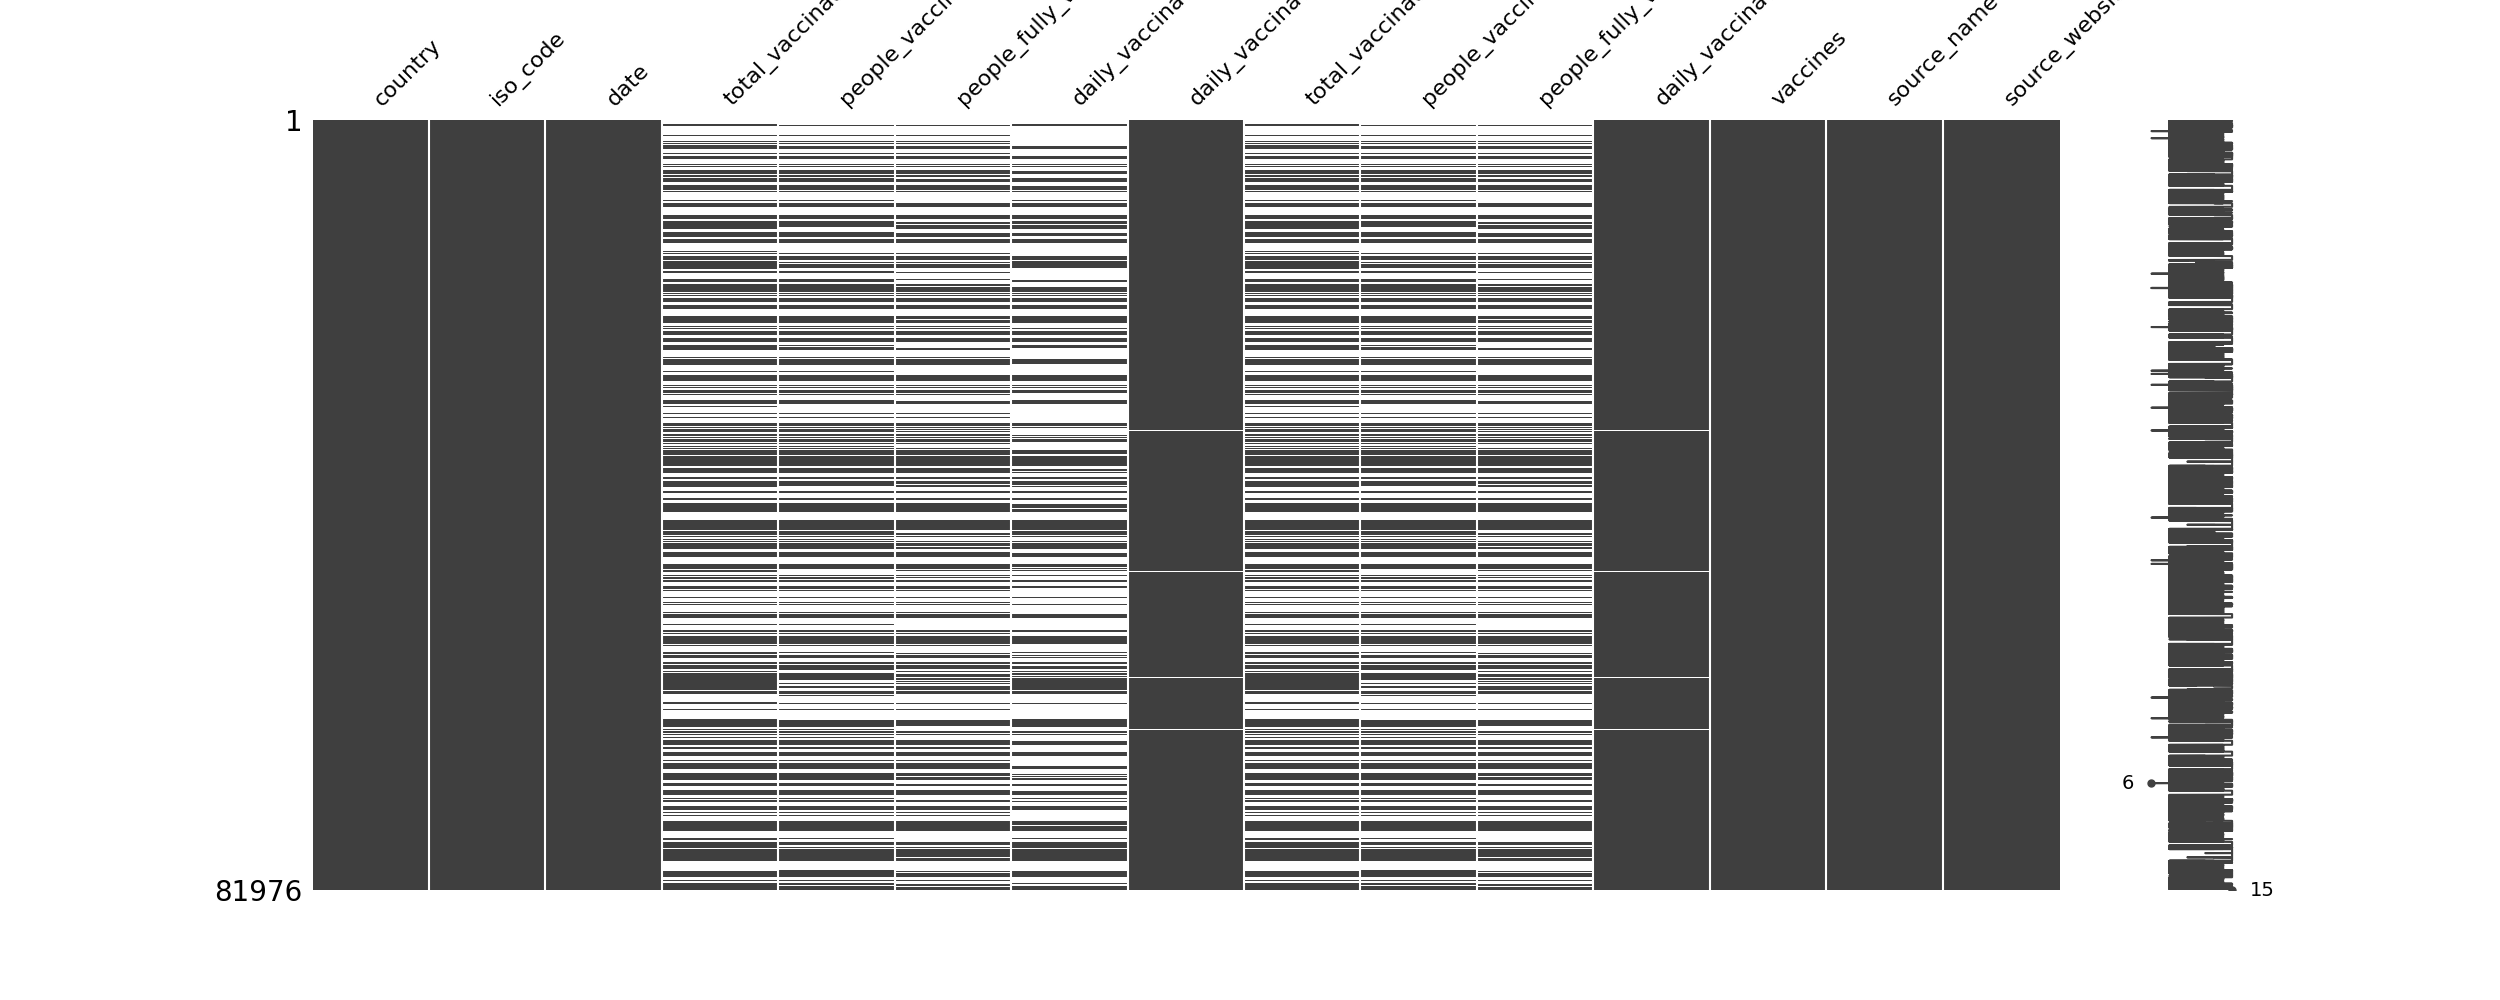

In [6]:
# missing data visualisation 
msno.matrix(df)

nomally we will need to handle the missing data in the dataset, but it is not the main focus of this tutorial. We will skip this procedure. 

the next step we normally do is to visualise the pair-wise linear correlation among features

Text(0.5, 1.0, 'Correlation Between different Features')

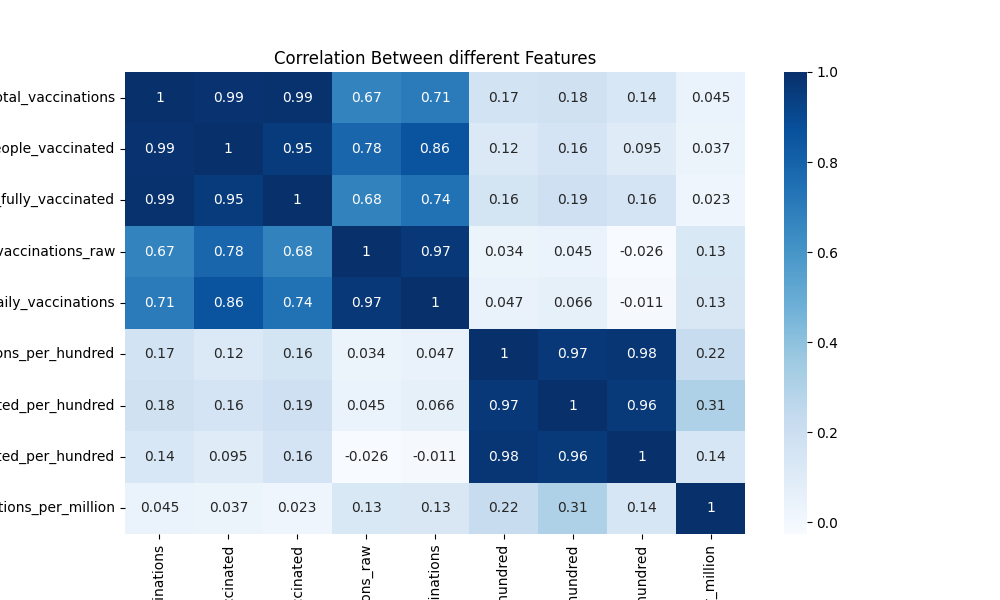

In [7]:
# first of all lets check about correlation in our data
fig,ax=plt.subplots(figsize=(10,6))
sns.heatmap(df.corr('pearson'),annot=True,cmap="Blues")
plt.title('Correlation Between different Features')

we can further plot the data to verify the linear correlation between features

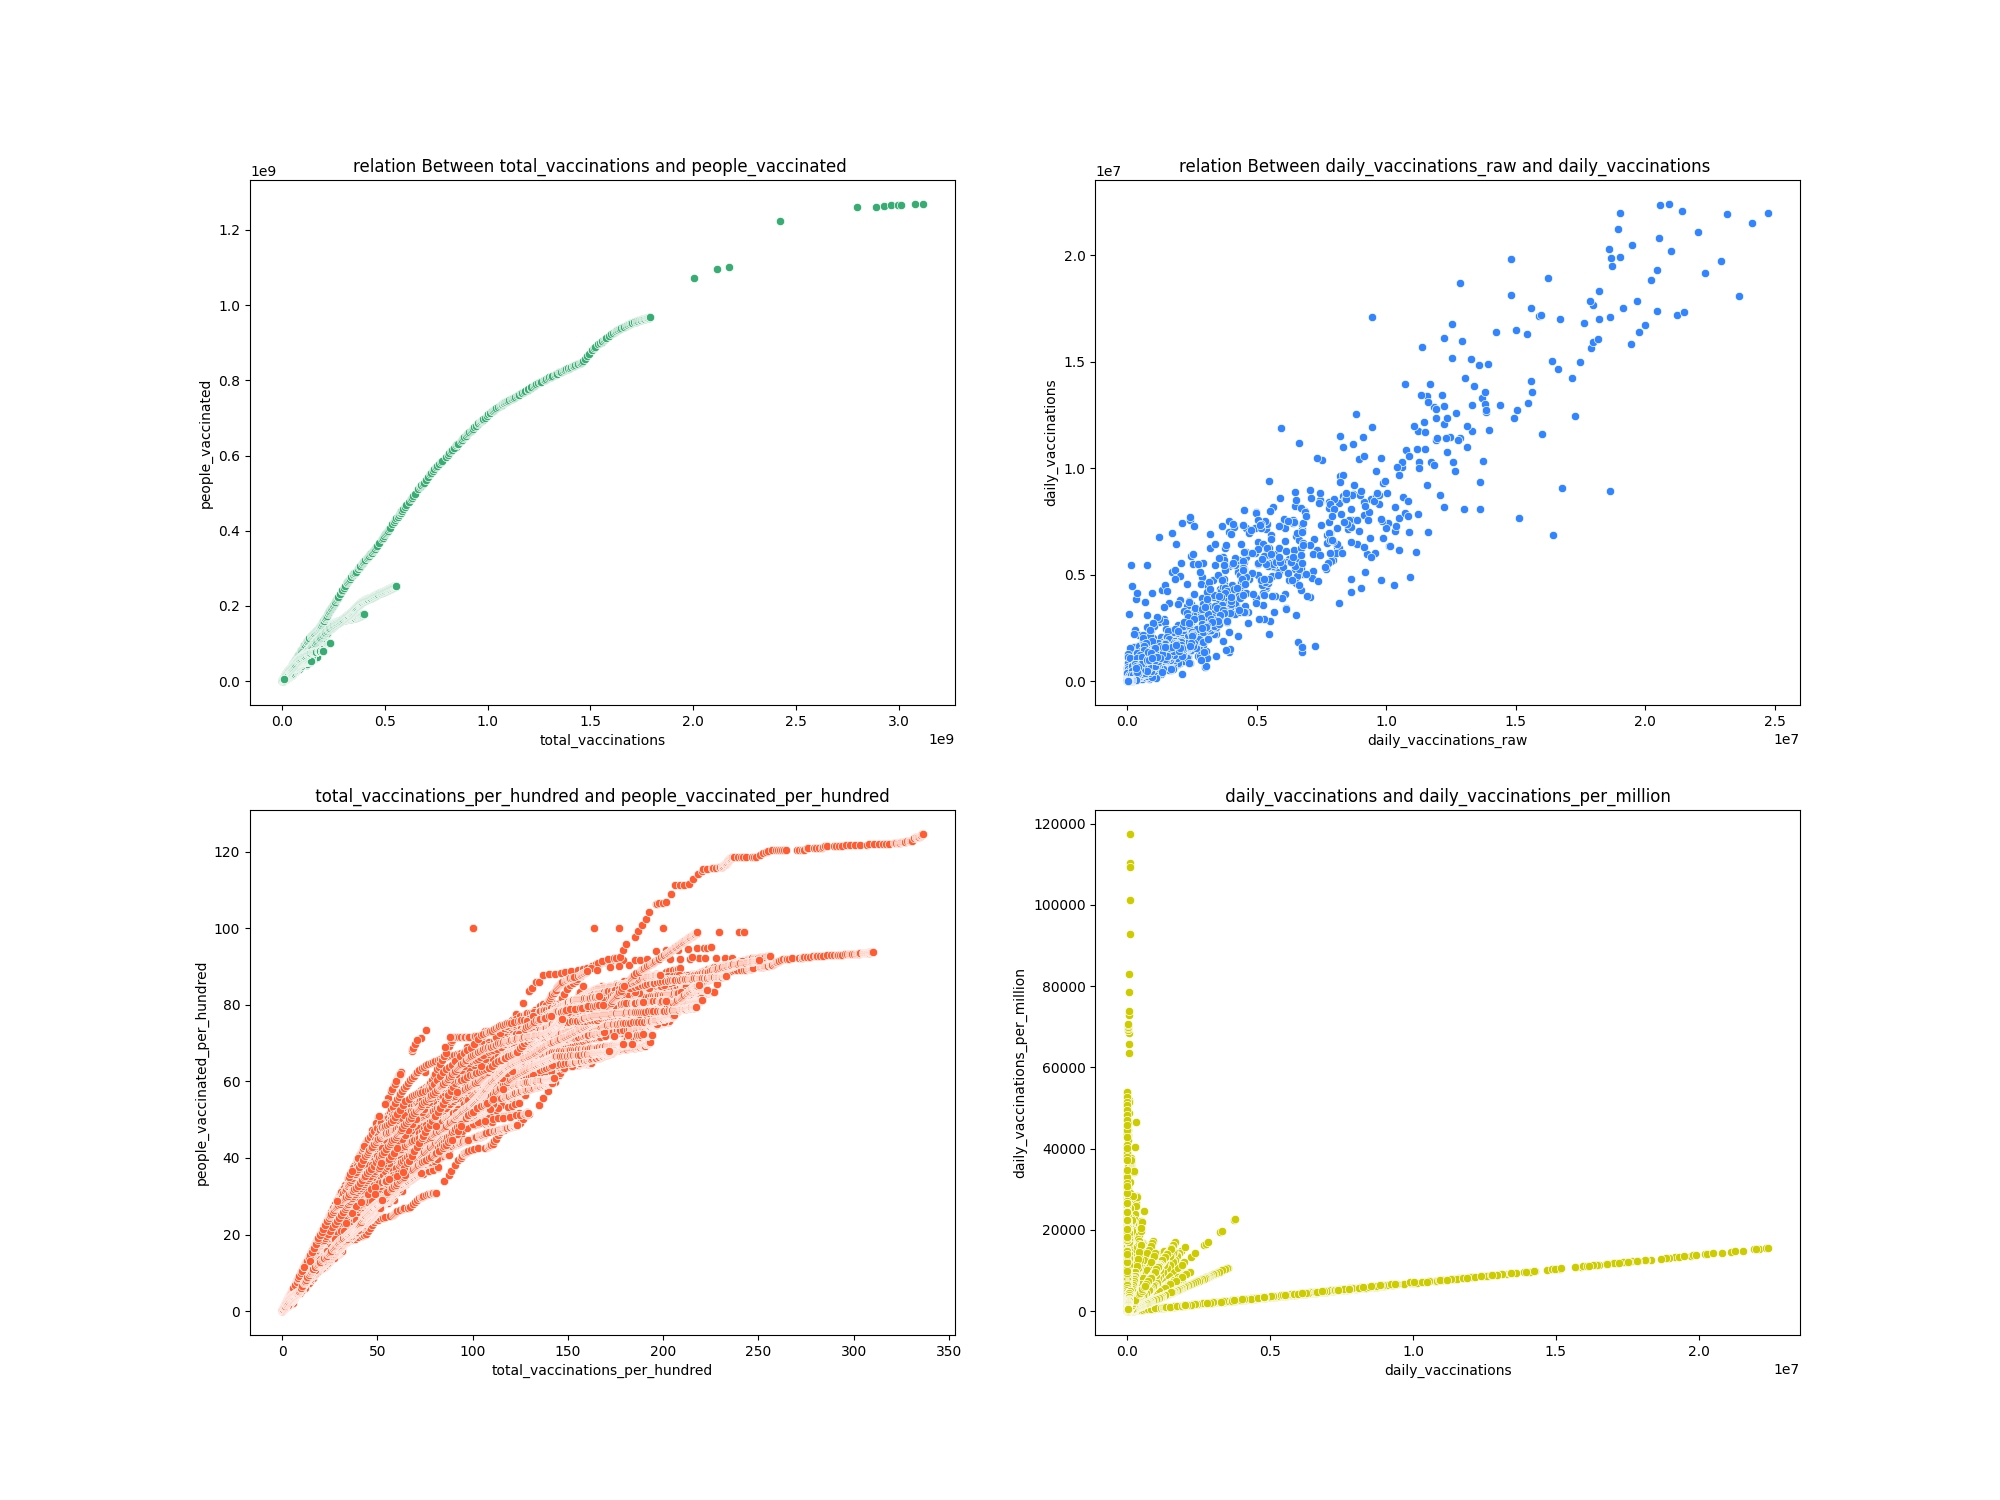

In [8]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
#fig 1
sns.scatterplot(x=df['total_vaccinations'], y=df['people_vaccinated'],ax=ax[0][0],color='#39ac73')
ax[0,0].set_title('relation Between total_vaccinations and people_vaccinated ')
#fig 2
sns.scatterplot(x=df['daily_vaccinations_raw'], y=df['daily_vaccinations'], color='#3385ff',ax=ax[0][1])
ax[0][1].set_title('relation Between daily_vaccinations_raw and daily_vaccinations ')
#fig 3
sns.scatterplot(x=df['total_vaccinations_per_hundred'], y=df['people_vaccinated_per_hundred'], color='#ff5c33',ax=ax[1][0])
ax[1][0].set_title(' total_vaccinations_per_hundred and people_vaccinated_per_hundred ')
#fig 4
sns.scatterplot(x=df['daily_vaccinations'],y=df['daily_vaccinations_per_million'], color='#cccc00',ax=ax[1][1])
ax[1][1].set_title(' daily_vaccinations and daily_vaccinations_per_million ')
plt.show()

Some interesting visualisation 

<AxesSubplot:title={'center':'Total Number of people fully Vaccinated By Top 10 countries'}, xlabel='country', ylabel='people_fully_vaccinated'>

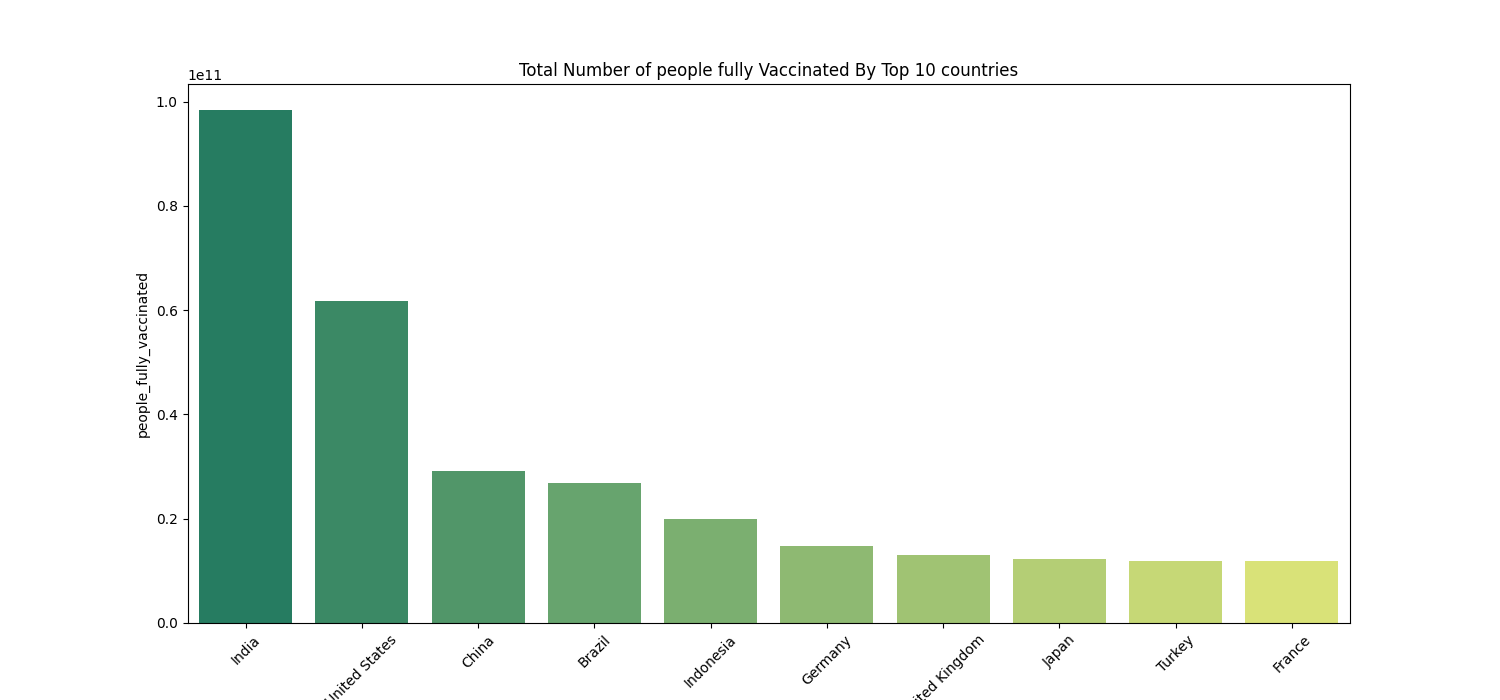

In [9]:
# now lets perform some data Analysis
sum_df=df.groupby('country').sum().sort_values(by='people_fully_vaccinated',ascending=False)[:10]
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Total Number of people fully Vaccinated By Top 10 countries')
plt.xticks(rotation=45)
sns.barplot(x=sum_df.index,y=sum_df['people_fully_vaccinated'],palette='summer')

<AxesSubplot:title={'center':'Average Number of people vaccinated per hundred By country'}, xlabel='country', ylabel='people_vaccinated_per_hundred'>

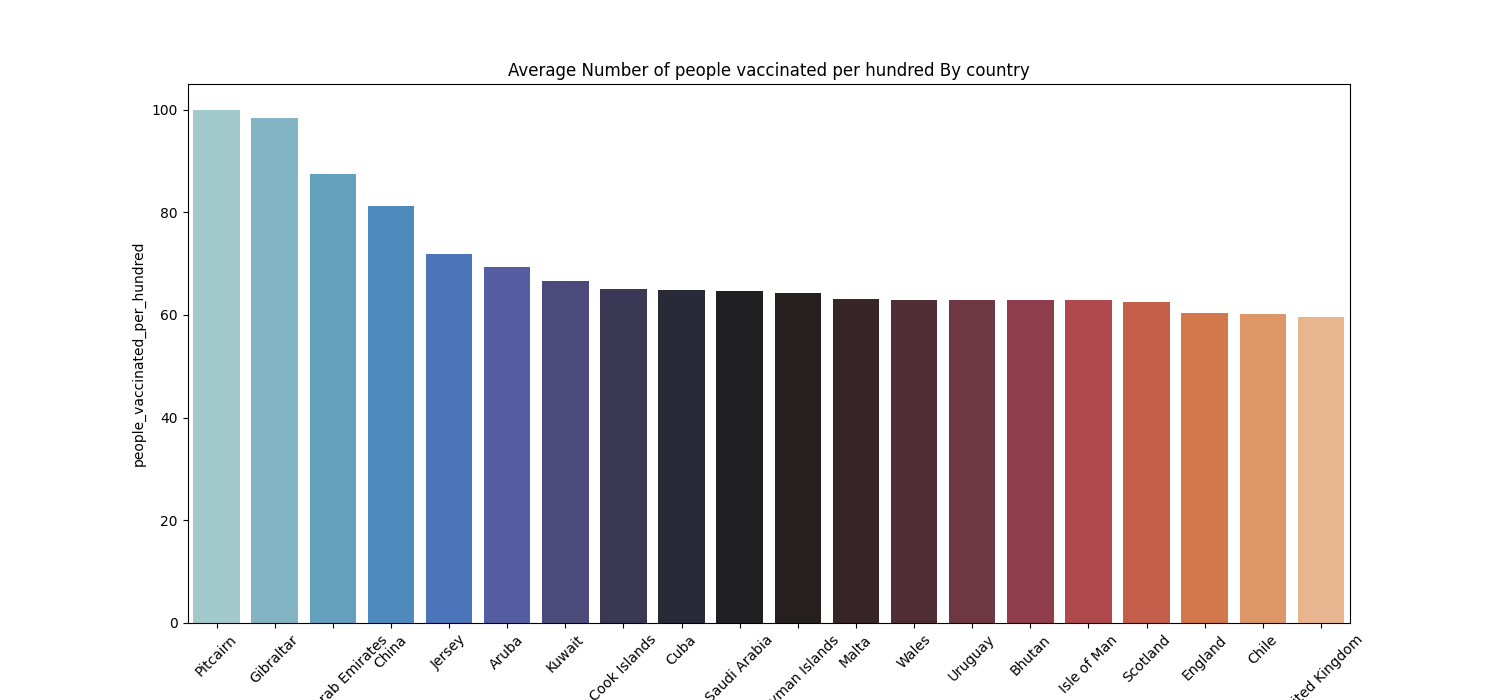

In [10]:
# now lets perform some data Analysis
mean_df=df.groupby('country').mean().sort_values(by='people_vaccinated_per_hundred',ascending=False)[:20]
fig,ax=plt.subplots(figsize=(15,7))
plt.title('Average Number of people vaccinated per hundred By country')
plt.xticks(rotation=45)
sns.barplot(x=mean_df.index,y=mean_df['people_vaccinated_per_hundred'],palette='icefire')

<AxesSubplot:title={'center':'Average Number of people vaccinated per hundred'}, xlabel='country', ylabel='people_vaccinated_per_hundred'>

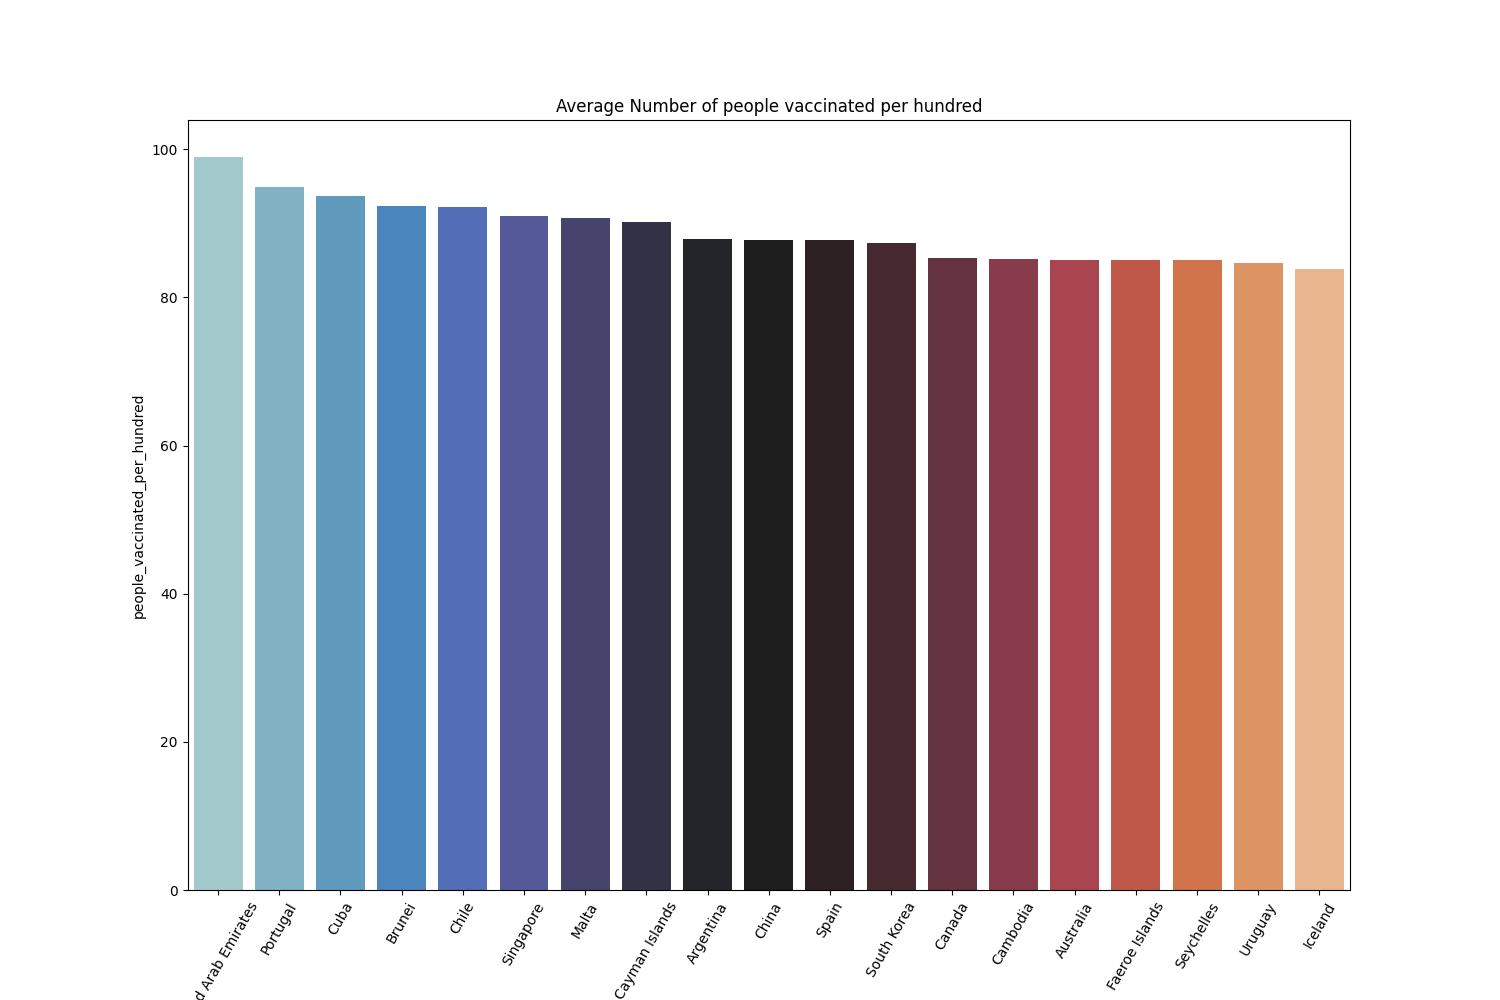

In [11]:
df['date']=pd.to_datetime(df['date'])
mask = (df['date'] > '2022-2-1') & (df['date'] <= '2022-3-1')
masked_df = df.loc[mask]

# now lets perform some data Analysis
mean_df=masked_df.groupby('country').mean().sort_values(by='people_vaccinated_per_hundred',ascending=False)[:20]
mean_df = mean_df[mean_df['people_vaccinated_per_hundred'] < 100] # filtering
fig,ax=plt.subplots(figsize=(15,10))
plt.title('Average Number of people vaccinated per hundred')
plt.xticks(rotation=60)
sns.barplot(x=mean_df.index,y=mean_df['people_vaccinated_per_hundred'],palette='icefire')

# 2. Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
# creating model
linear_regression_model=LinearRegression(n_jobs=1)

In [13]:
%time
# now we have added one more columns that is difference of date
# now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data
dt['date_diff']=np.arange(len(dt['total_vaccinations']))

# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']
linear_regression_model.fit(x,y)

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 26.9 µs


LinearRegression(n_jobs=1)

In [14]:
linear_regression_model=LinearRegression(n_jobs=-1)

In [15]:
%time
# now we have added one more columns that is difference of date
# now we will see that how many vaccines are vaccinated each day
df['date']=pd.to_datetime(df['date'])
dt=df.groupby('date').sum() # the number of row is decided by the number of date in the data
dt['date_diff']=np.arange(len(dt['total_vaccinations']))

# lets create our x and Y variable
x=dt[['date_diff']]
y=dt['total_vaccinations']
linear_regression_model.fit(x,y)

CPU times: user 8 µs, sys: 3 µs, total: 11 µs
Wall time: 21.9 µs


LinearRegression(n_jobs=-1)

In [16]:
print(linear_regression_model.coef_)
print(linear_regression_model.intercept_)

[23556412.92394385]
-1543002423.9235706


In [17]:
#lets predict after 1 year how many vaccines will be made i.e 365 days so our x value will be 365
pr=linear_regression_model.predict(x)

In [18]:
x

,date_diff
date,
2020-12-02,0
2020-12-03,1
2020-12-04,2
2020-12-05,3
2020-12-06,4
...,...
2022-03-03,456
2022-03-04,457
2022-03-05,458


<AxesSubplot:title={'center':'Best Fit Line'}, xlabel='date_diff', ylabel='total_vaccinations'>

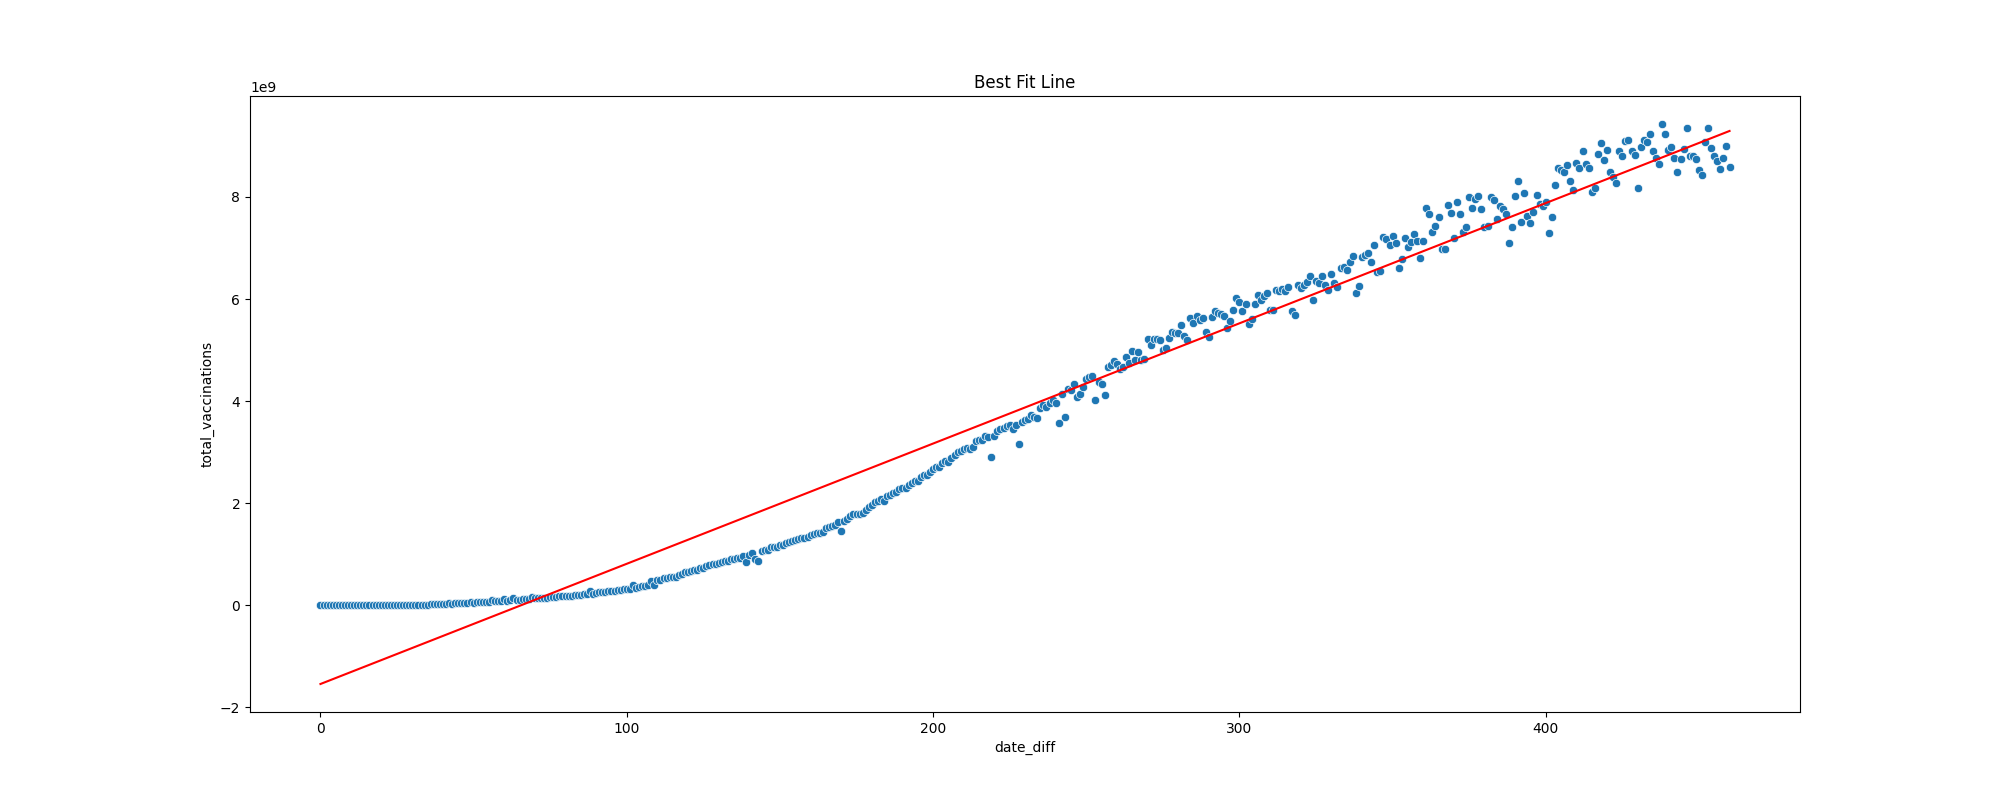

In [19]:
#lets visualize our total vaccination by day
fig,ax=plt.subplots(figsize=(20,8))
plt.title('Best Fit Line')
sns.scatterplot(x=dt['date_diff'],y=dt['total_vaccinations'])
sns.lineplot(x=x.to_numpy().squeeze(), y=pr, color='r')

# 3. K-means

In [20]:
from sklearn.cluster import KMeans

dt=df.groupby('country', as_index=False).sum().sort_values(by=['total_vaccinations'], ascending=False)[10:30]
dt=dt[['country','total_vaccinations', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']]

kmeans = KMeans(n_clusters=2).fit(dt[['total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'daily_vaccinations']])
centroids = kmeans.cluster_centers_
print(centroids)

[[3.30879458e+04 1.68503375e+04 7.79244793e+07]
 [1.75641413e+04 9.32284875e+03 1.84904804e+08]]


In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 100 to 10
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         20 non-null     object 
 1   total_vaccinations              20 non-null     float64
 2   total_vaccinations_per_hundred  20 non-null     float64
 3   people_vaccinated_per_hundred   20 non-null     float64
 4   daily_vaccinations              20 non-null     float64
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


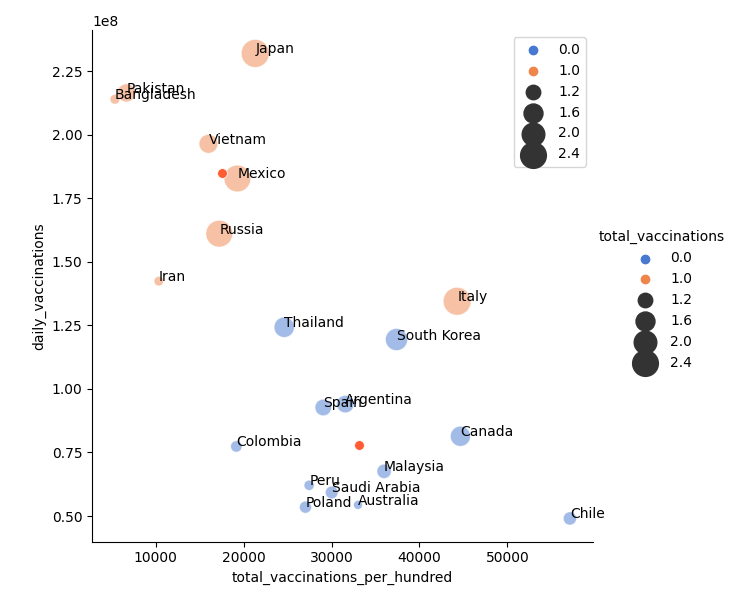

In [22]:
sns.relplot(x=dt['total_vaccinations_per_hundred'], y=dt['daily_vaccinations'], hue=kmeans.labels_.astype(float), size="total_vaccinations",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=dt)
sns.scatterplot(x=centroids[:, 0], y=centroids[:, 2], color='#ff5c33', s=50)
for i in range(len(dt)):
    country = dt.iloc[i].country
    plt.text(dt.total_vaccinations_per_hundred[dt.country==country],dt.daily_vaccinations[dt.country==country],country)


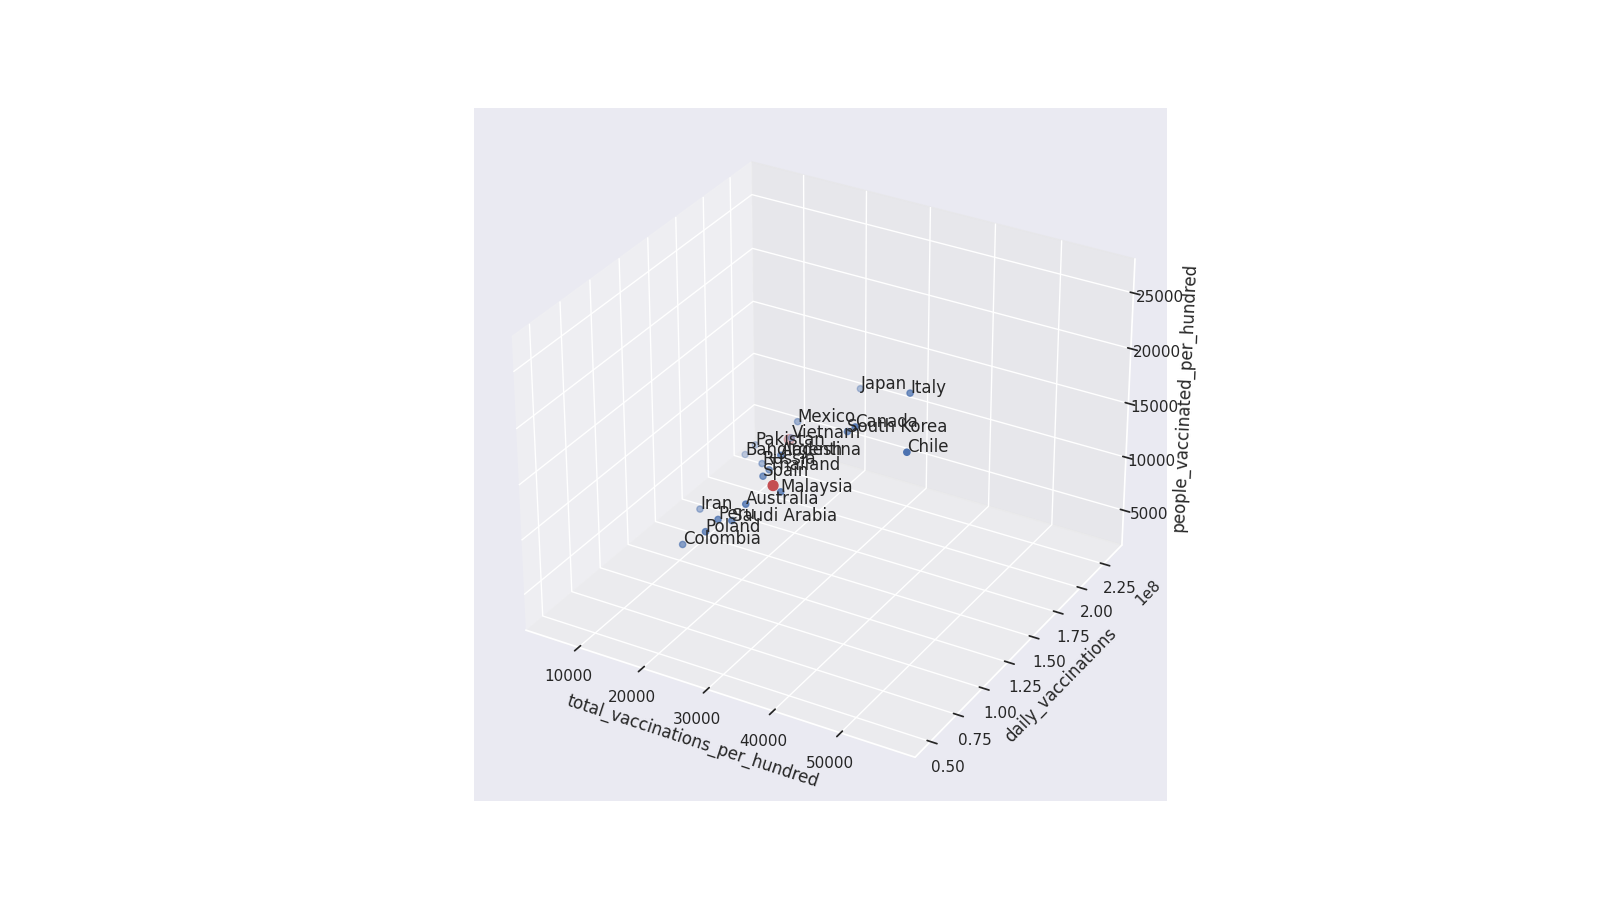

In [23]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111, projection = '3d')

x = dt['total_vaccinations_per_hundred']
y = dt['daily_vaccinations']
z = dt['people_vaccinated_per_hundred']


ax.set_xlabel("total_vaccinations_per_hundred")
ax.set_ylabel("daily_vaccinations")
ax.set_zlabel("people_vaccinated_per_hundred")

ax.scatter(x, y, z)
ax.scatter(centroids[:,0], centroids[:, 2], centroids[:,1],color='r', s=50)
for i in range(len(dt)):
    country = dt.iloc[i].country
    ax.text(float(dt.total_vaccinations_per_hundred[dt.country==country]),float(dt.daily_vaccinations[dt.country==country]),float(dt.people_vaccinated_per_hundred[dt.country==country]),s=country)

plt.show()

# 4. scikit learn multicore benchmark (optional)

### adopted from: https://towardsdatascience.com/leverage-multicore-for-faster-performance-in-scikit-learn-147c374ad2d3

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from time import time
from matplotlib import pyplot as plt

In [2]:
# small dataset volcanoes-b3
X,y= fetch_openml(name="creditcard",return_X_y=True,as_frame=True)

In [3]:
#about 15 mins to run on OOD 16 core XLarge
timetaken = []
n_cores = [1, 2, 4, 8, 16]

for n in n_cores:
    start = time()
    model = RandomForestClassifier(n_estimators=100,
                                   random_state=42, n_jobs=n)
    model.fit(X, y)
    end = time()
    elapsedtime = end - start
    timetaken.append(elapsedtime)


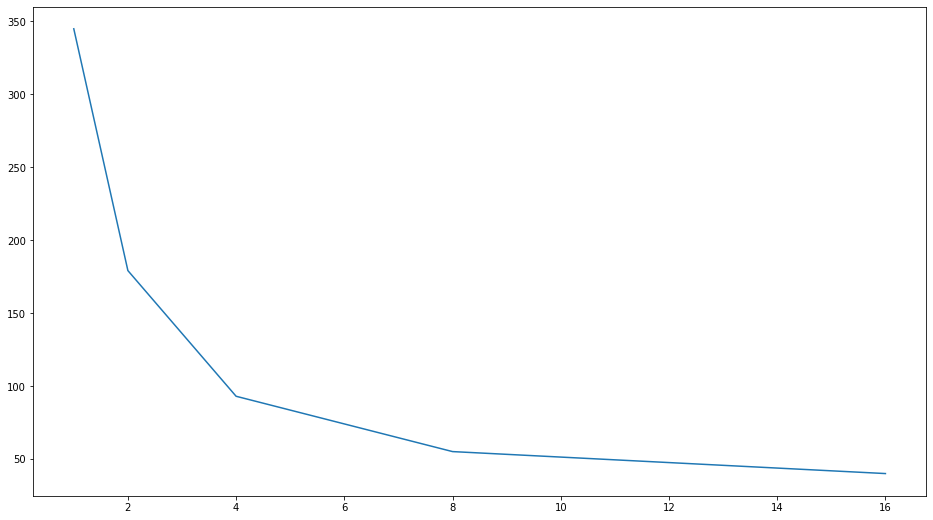

In [7]:
fig = plt.figure(50,figsize=(16,9))
plt.plot(n_cores, timetaken)
plt.show()

In [7]:
#about 1 min
start = time()
model = RandomForestClassifier(n_estimators=100,
                               random_state=42, n_jobs=-1)
model.fit(X, y)
end = time()
elapsedtime = end - start
elapsedtime

40.2604398727417